In [1]:
pip install wordcloud nltk python-docx matplotlib

  Obtaining dependency information for python-docx from https://files.pythonhosted.org/packages/5f/d8/6948f7ac00edf74bfa52b3c5e3073df20284bec1db466d13e668fe991707/python_docx-1.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/239.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/239.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/239.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/239.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/239.6 kB 262.6 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/239.6 kB 363.1 kB/s eta 0:00:01
   --------------------- ---------------- 133.1/239.6 kB 657.1 kB/s eta 0:00:01
   -------------------------------- ----- 204.8/239.6 kB 831.5 kB/s eta 0:00:01
   -------------------------------------- 239.6/239.6 kB 862.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Pod timhle je WORDCLOUD
je nic moc zitra z nej zkusim vyjmout ty slova jako samozrejme atd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


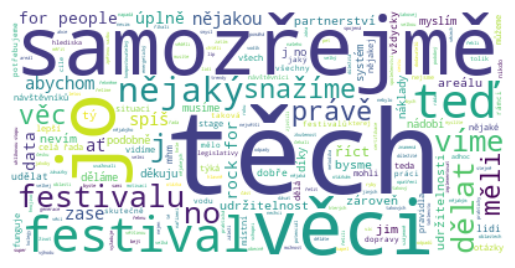

In [4]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from docx import Document
import matplotlib.pyplot as plt
import string
import nltk

doc = Document('Transkript-naanalyzu.docx')
text = ' '.join([paragraph.text for paragraph in doc.paragraphs])
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))

with open('stopwords-cs.txt', 'r') as f:
    stopwords = set(f.read().splitlines())

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Term Frequency-Inverse Document Frequency metoda
tady je pro každý odstavec vždy top 10 slov oskorovaných podle TFIDF metody. Bere to frekvenci slov v celem dokumentu a srovná jí to s frekevencí toho slova v konkretnim odstavci takže ve finale dostaneme slova která jsou specificka a zasadni pro ten konkretni odstavec. 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc = Document('Transkript-naanalyzu.docx')
paragraphs = [paragraph.text for paragraph in doc.paragraphs]
paragraphs = [p.lower().translate(str.maketrans('', '', string.punctuation)) for p in paragraphs]

with open('stopwords-cs.txt', 'r') as f:
    stopwords = list(f.read().splitlines())

vectorizer = TfidfVectorizer(stop_words=stopwords)
tfidf_scores = vectorizer.fit_transform(paragraphs)

feature_names = vectorizer.get_feature_names_out()
for i, scores in enumerate(tfidf_scores.toarray()):
    sorted_indices = np.argsort(scores)[::-1]
    sorted_words = np.array(feature_names)[sorted_indices]
    sorted_scores = scores[sorted_indices]
    print(f'Paragraph {i+1}:')
    for word, score in zip(sorted_words[:10], sorted_scores[:10]):
        print(f'    {word}: {score}')

Paragraph 1:
    záznamu: 0.5545732914988878
    anonymizované: 0.5545732914988878
    té: 0.46429799830534413
    práci: 0.4114903370455132
    mýt: 0.0
    myslím: 0.0
    muset: 0.0
    musím: 0.0
    měla: 0.0
    musíme: 0.0
Paragraph 2:
    hm: 0.5145698768514588
    napsáno: 0.5145698768514588
    myslíte: 0.4038406801668537
    for: 0.3200772764591504
    people: 0.3200772764591504
    rock: 0.3200772764591504
    myslím: 0.0
    muset: 0.0
    musím: 0.0
    musíme: 0.0
Paragraph 3:
    pošlu: 0.5504872974987752
    nezmiňovali: 0.2752436487493876
    festas: 0.2752436487493876
    ředitel: 0.2752436487493876
    jiřímu: 0.2752436487493876
    asociace: 0.2752436487493876
    domluvit: 0.249034356686669
    důležité: 0.23043856802984208
    můžeme: 0.20422927596712345
    práci: 0.20422927596712345
Paragraph 4:
    žít: 0.0
    msc: 0.0
    muset: 0.0
    musím: 0.0
    musíme: 0.0
    musíte: 0.0
    myslej: 0.0
    mysleli: 0.0
    myslí: 0.0
    myslím: 0.0
Paragraph 5:
   

c:\Users\lukas\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['chut', 'ted'] not in stop_words.
  warnings.warn(


# Nakonec tady je to samé ale v histogramech 
každý ostavec je jeden histogram, zítra se snad podívám na to jak to delimituje odstavce, protože jich tu je moc 51 odstavců v tom souboru není. 

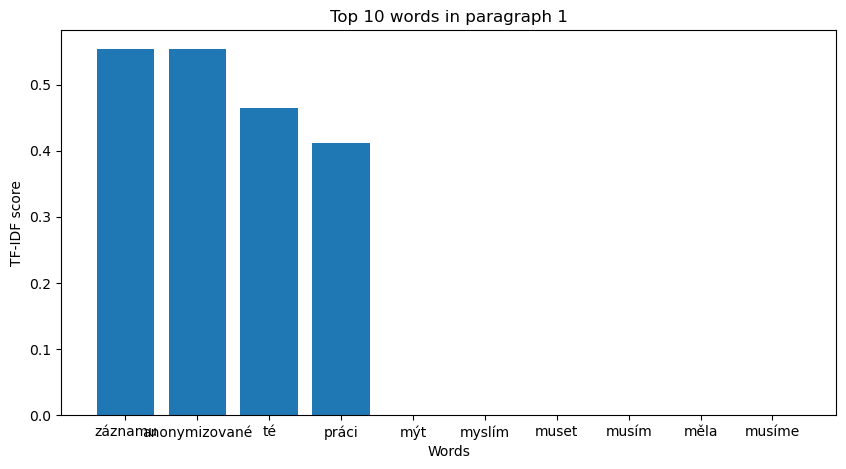

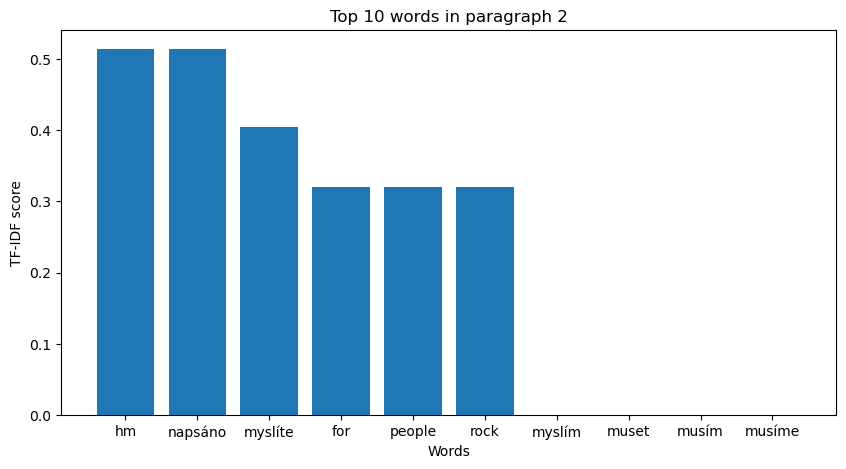

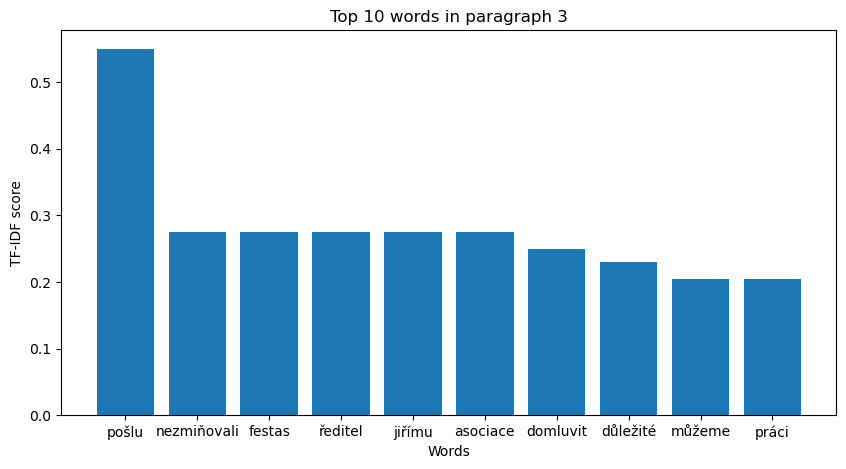

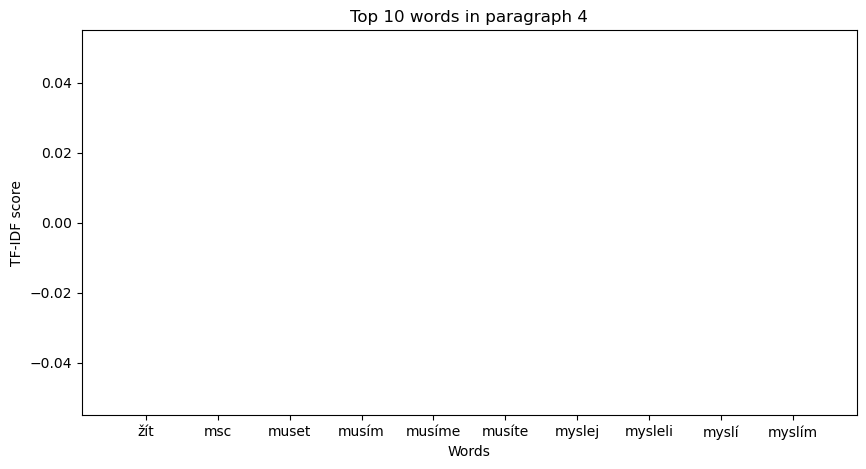

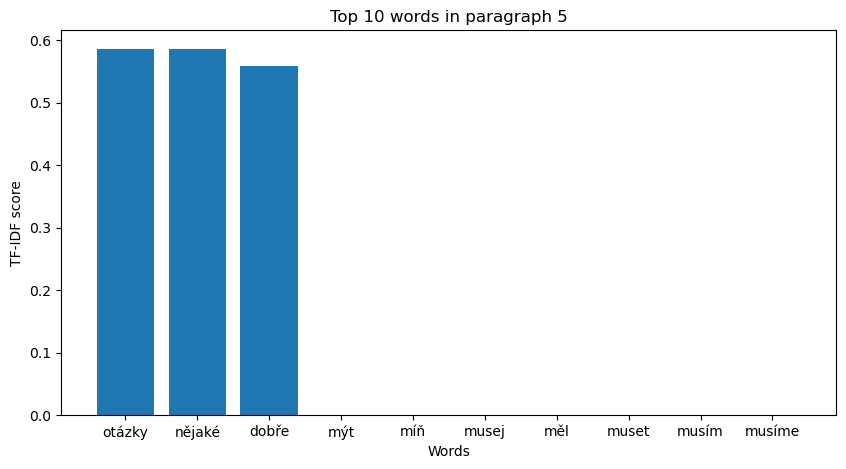

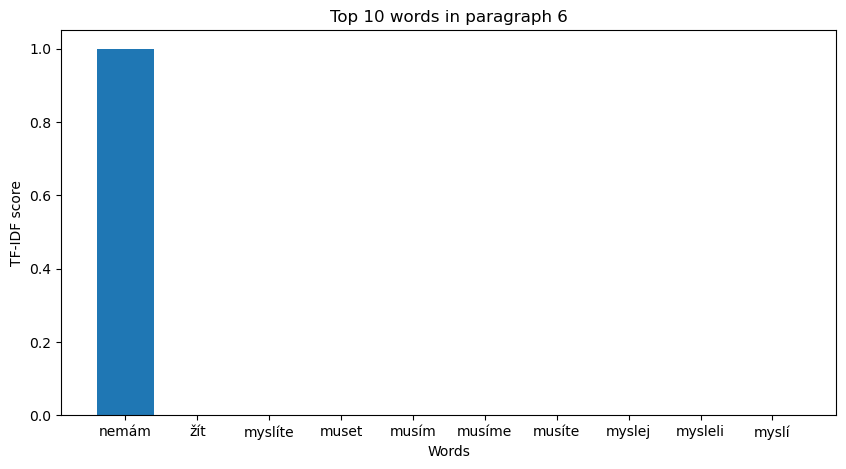

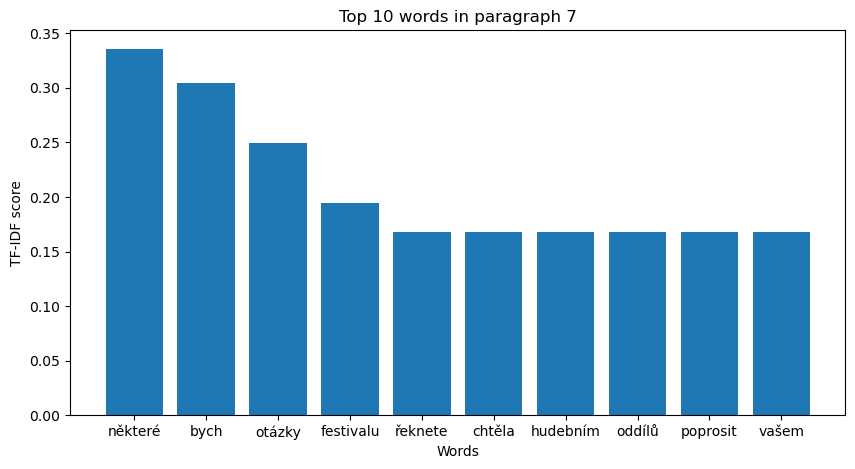

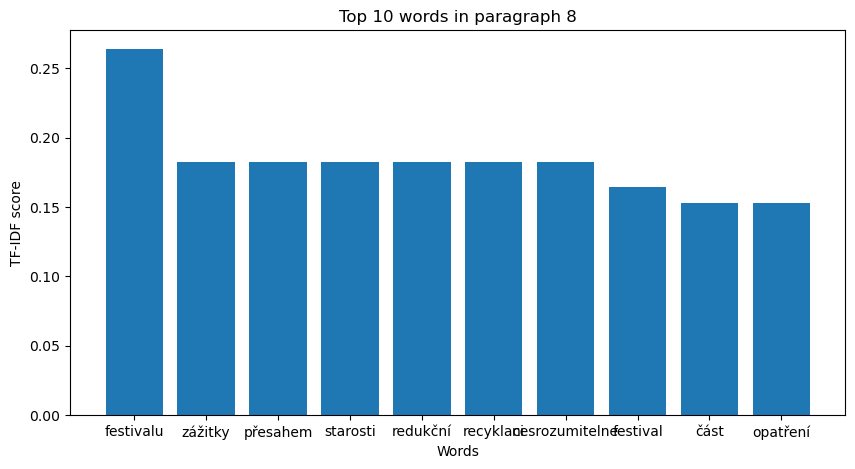

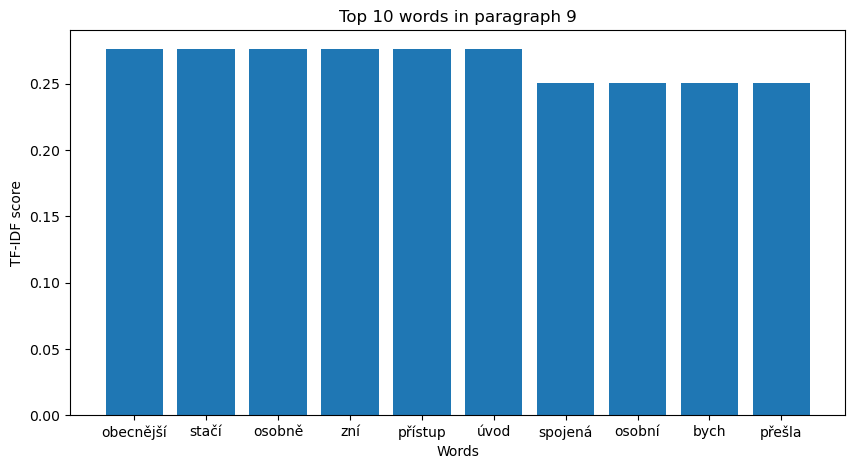

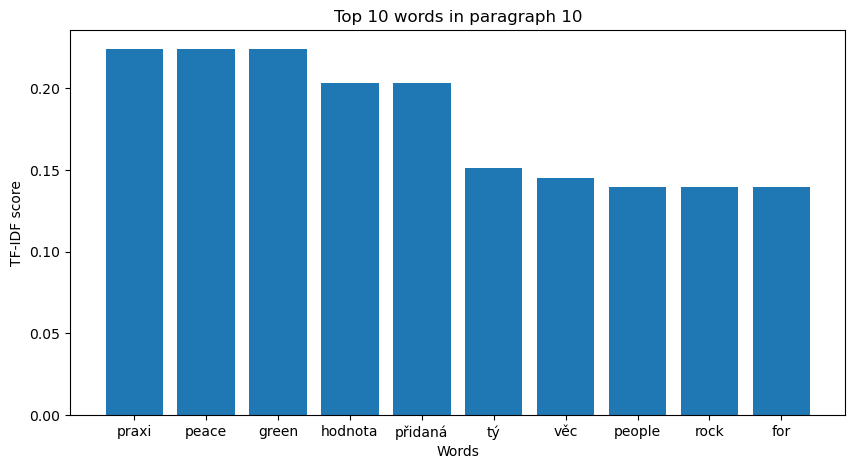

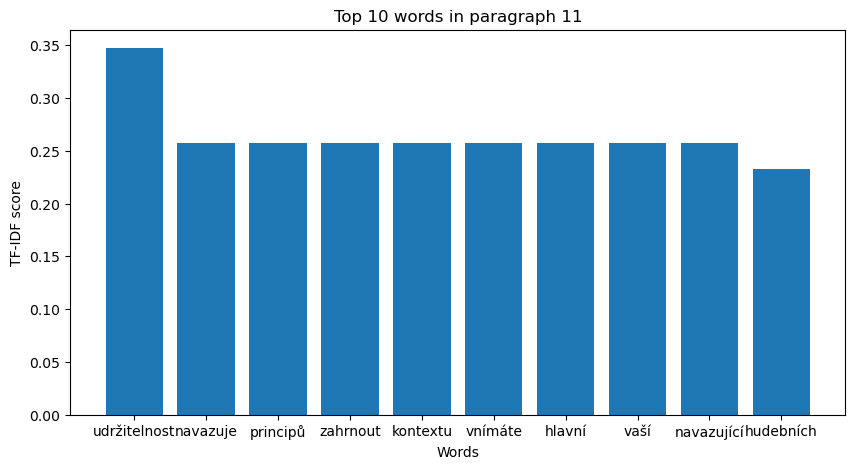

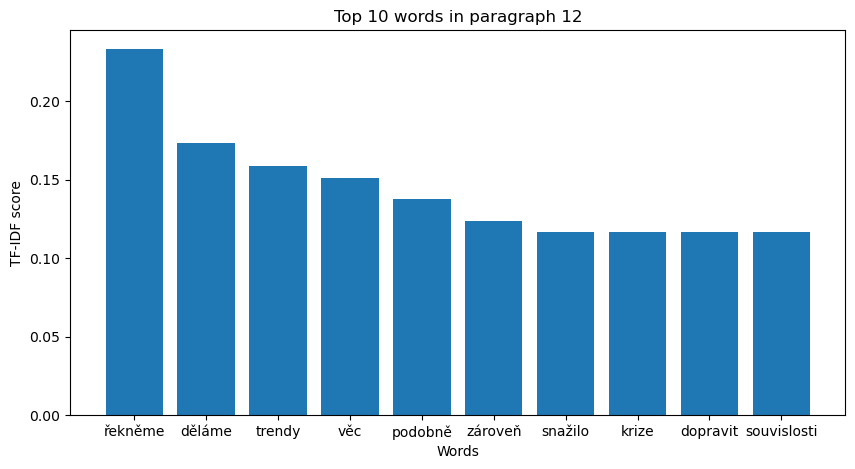

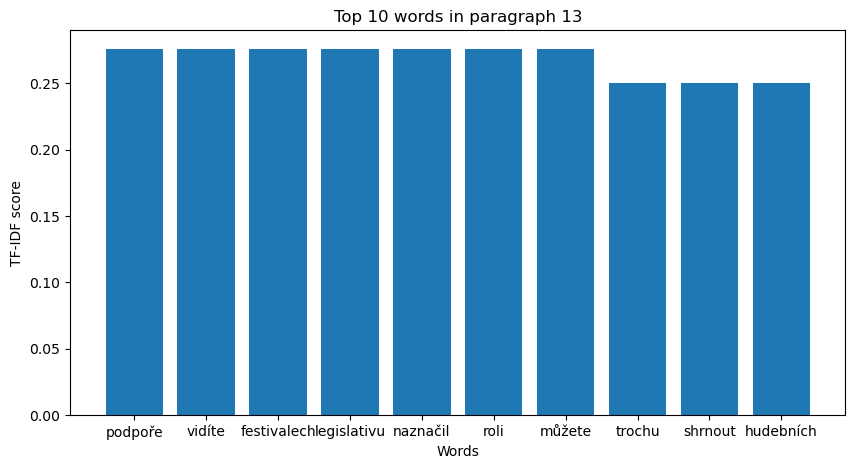

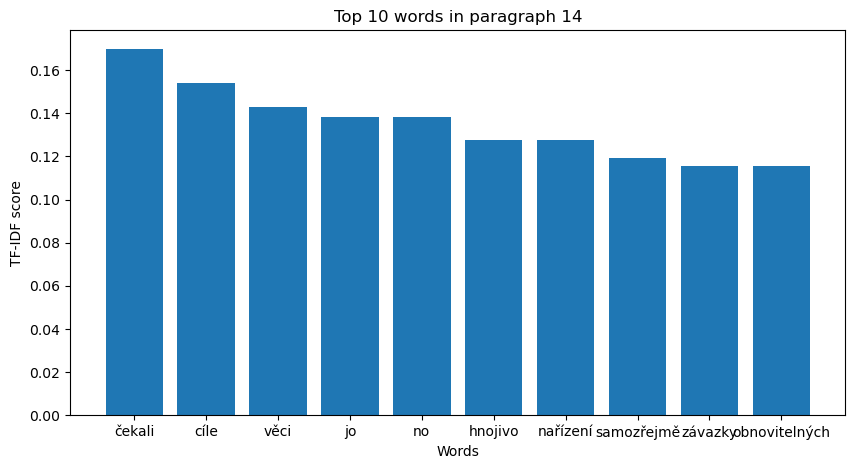

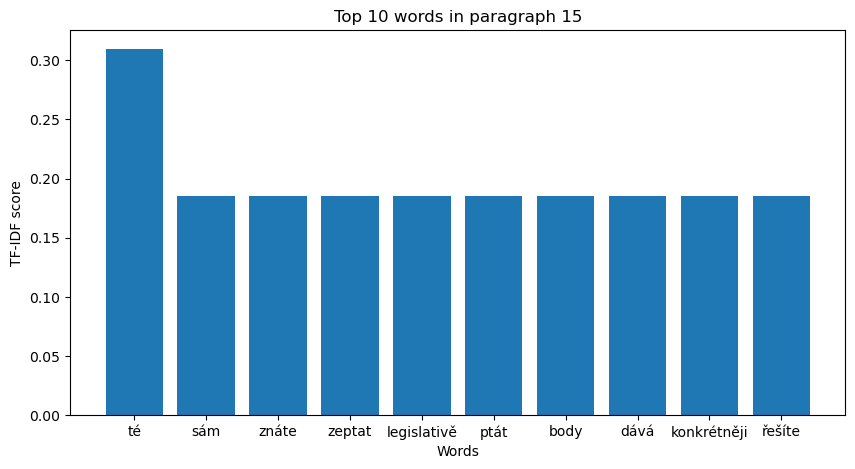

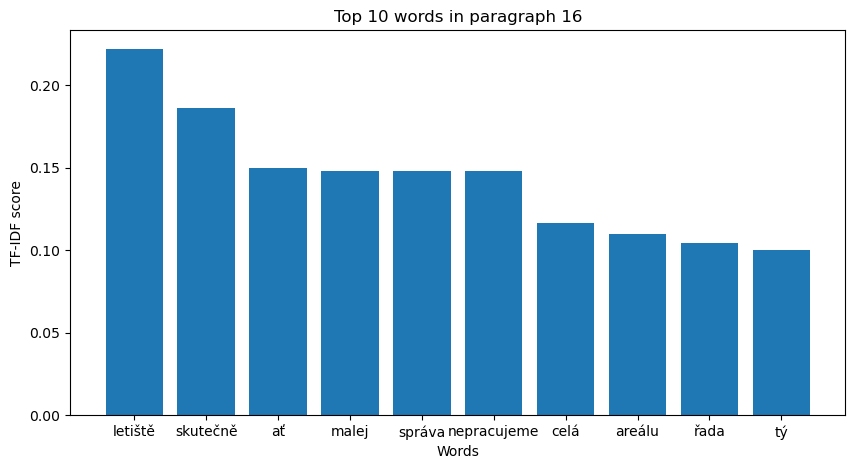

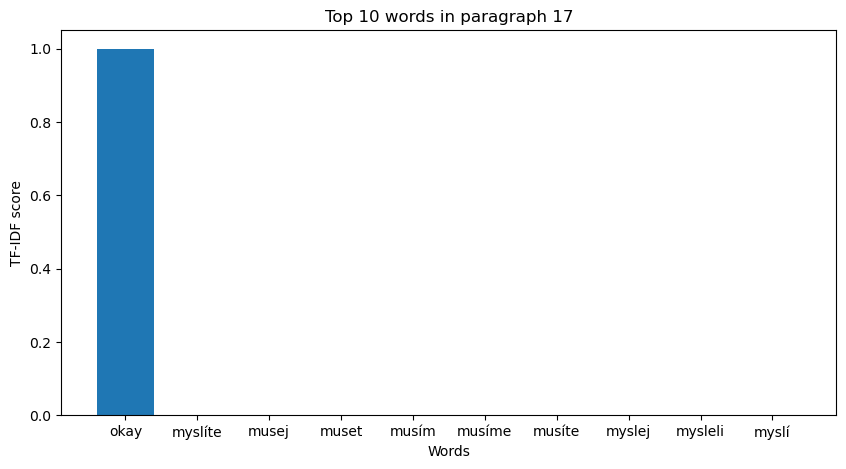

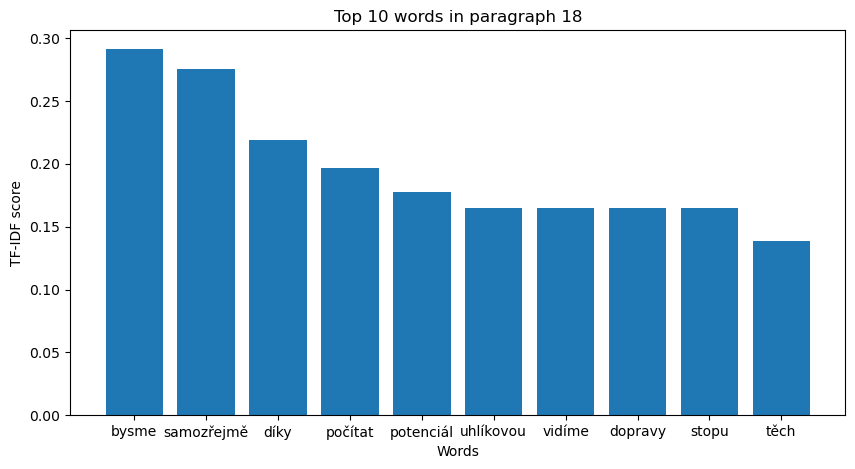

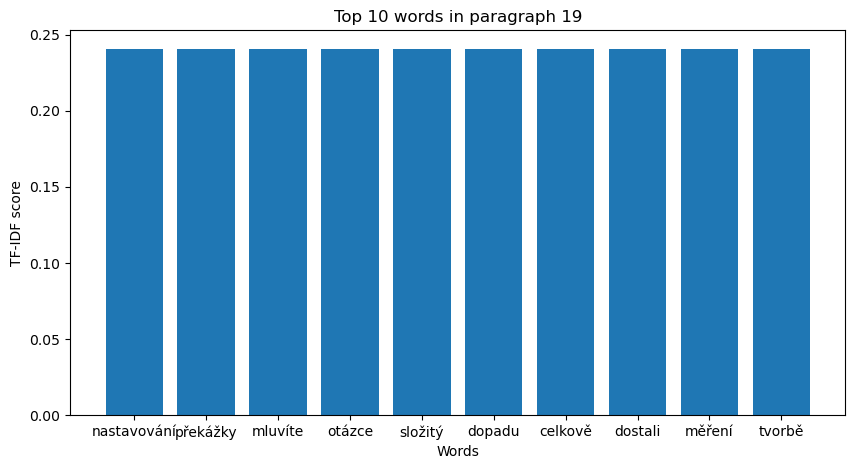

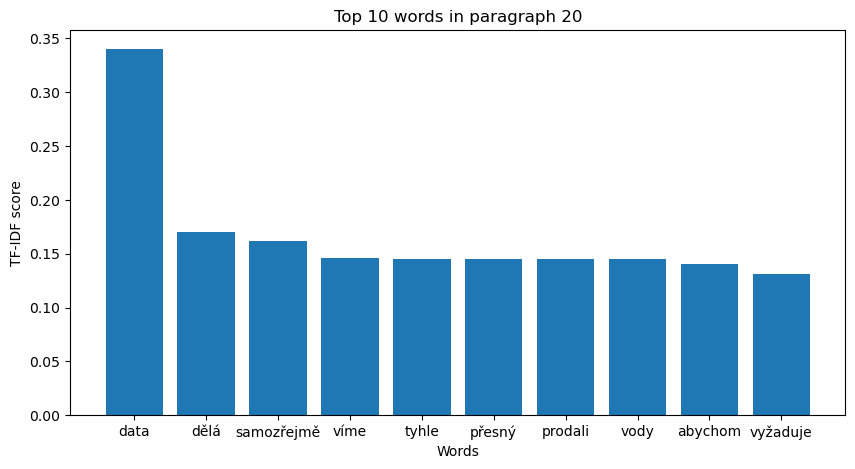

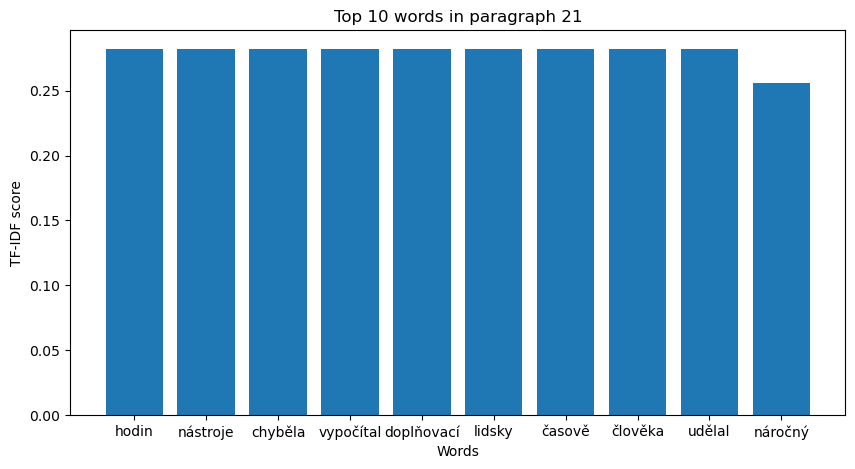

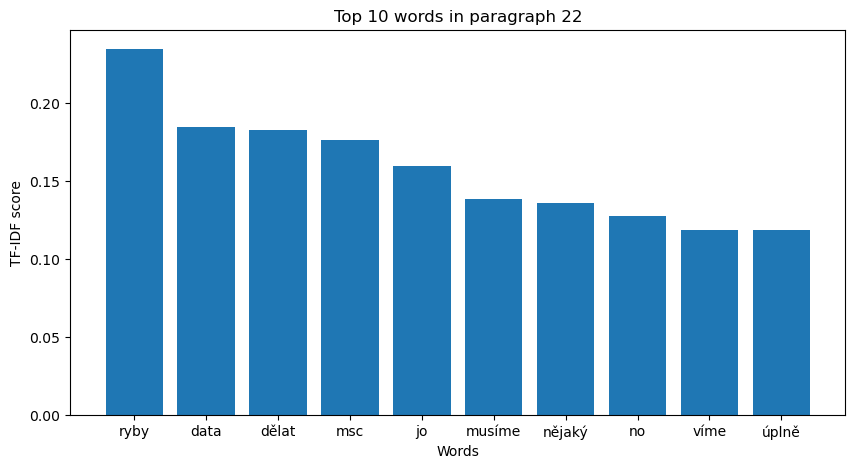

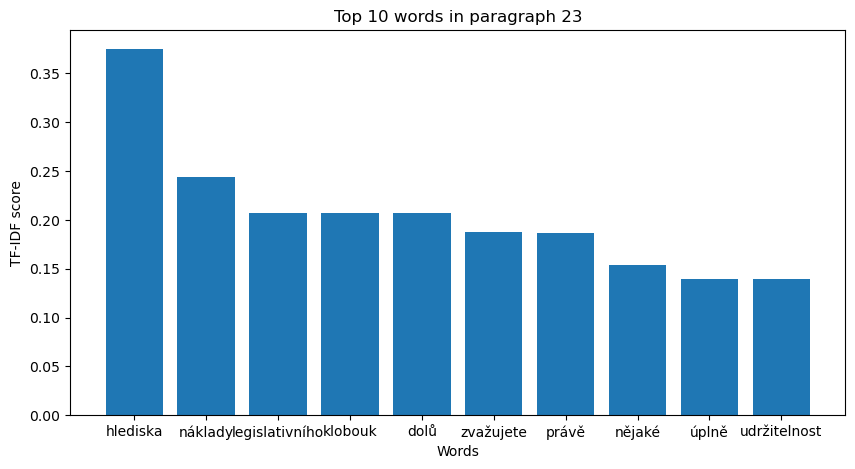

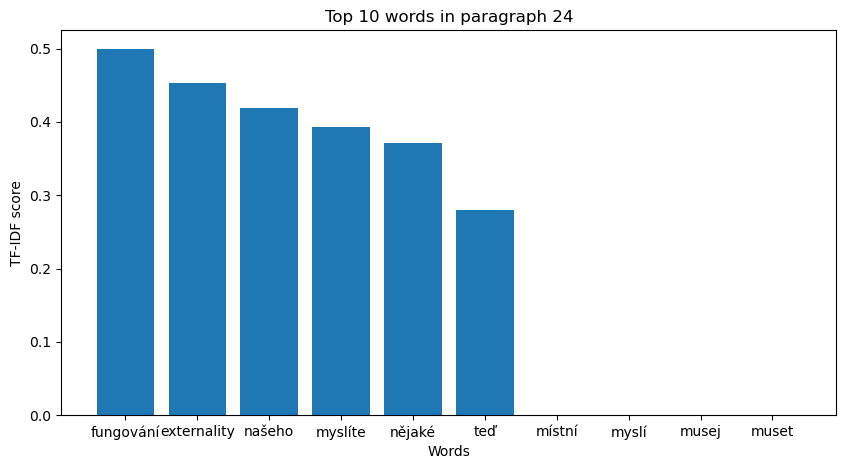

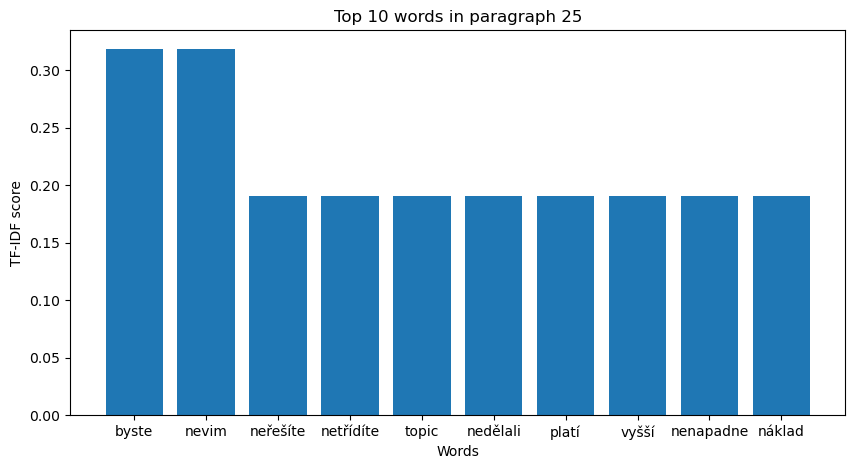

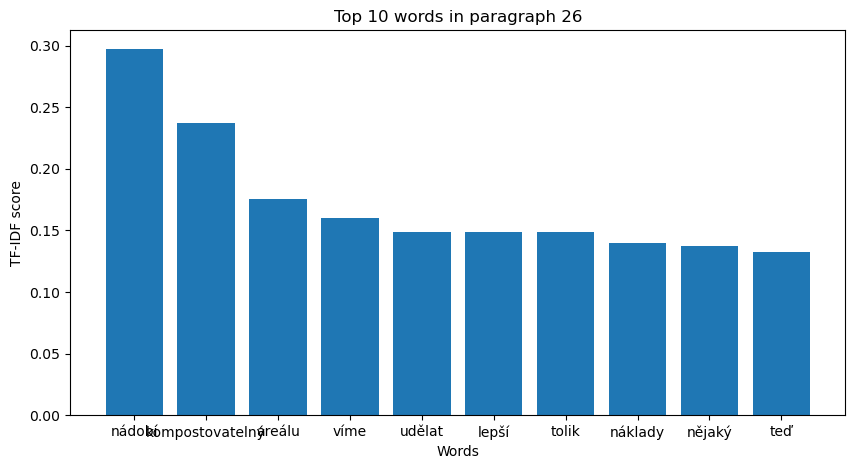

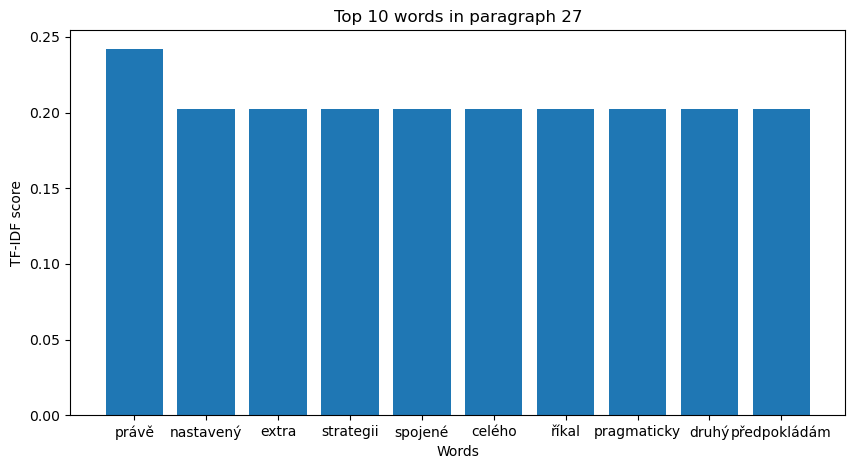

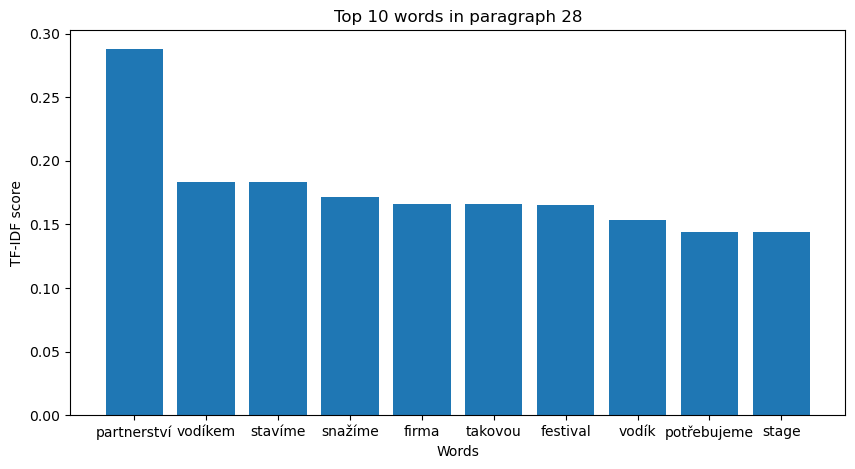

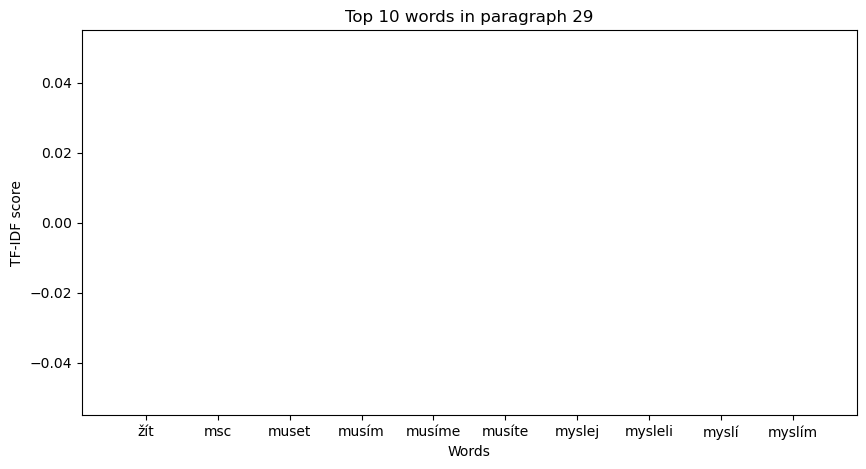

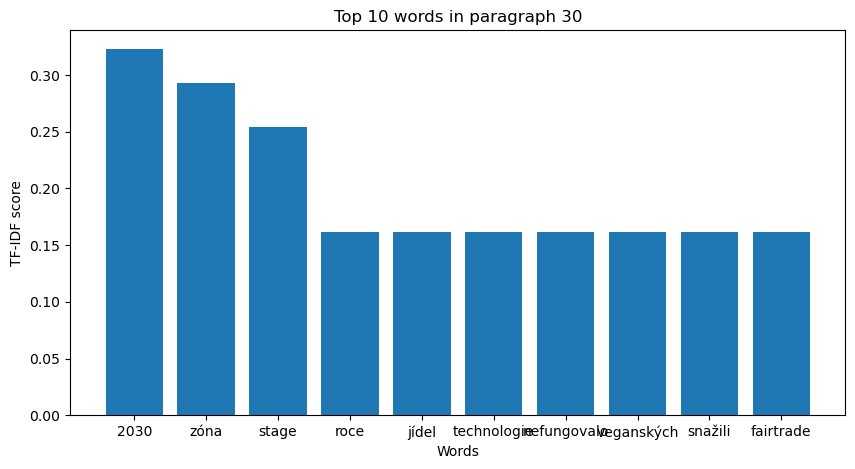

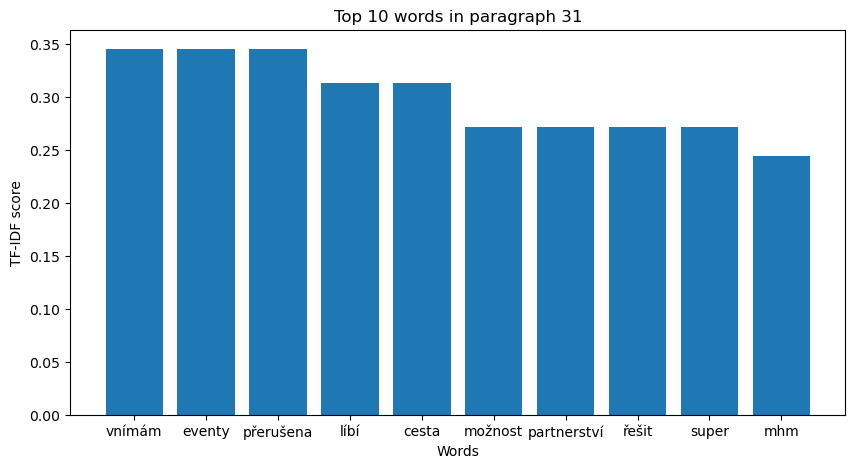

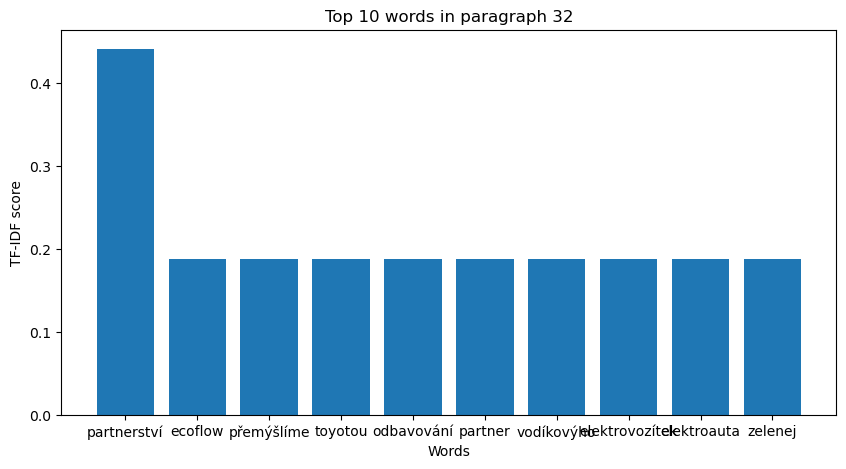

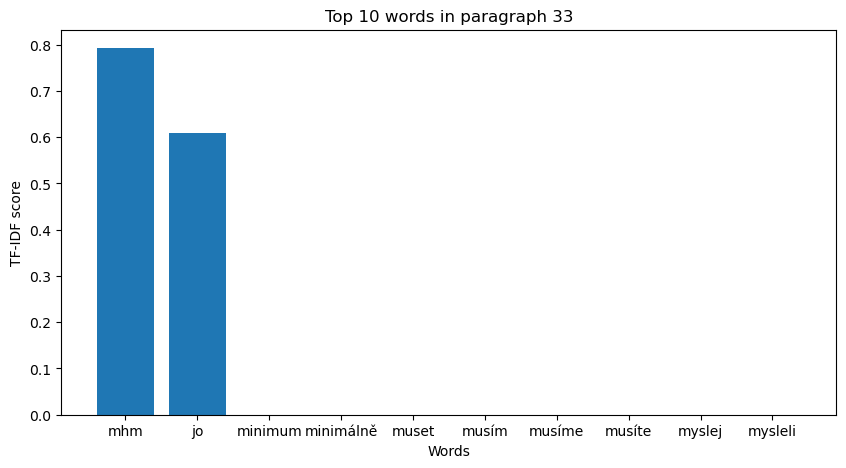

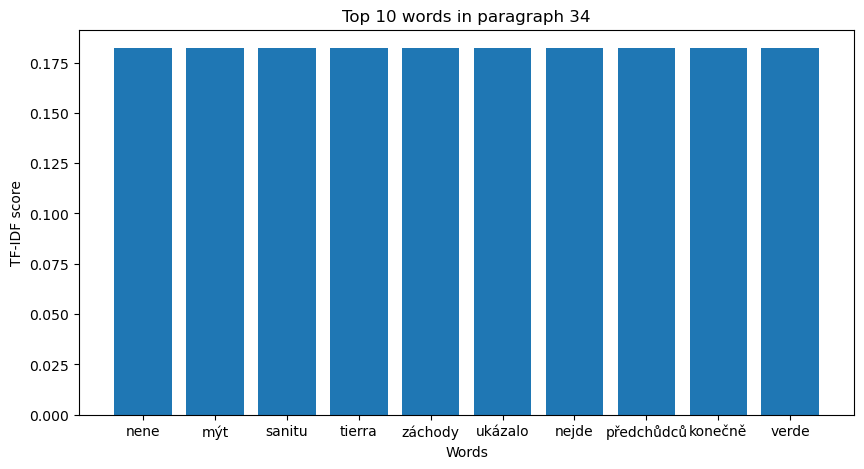

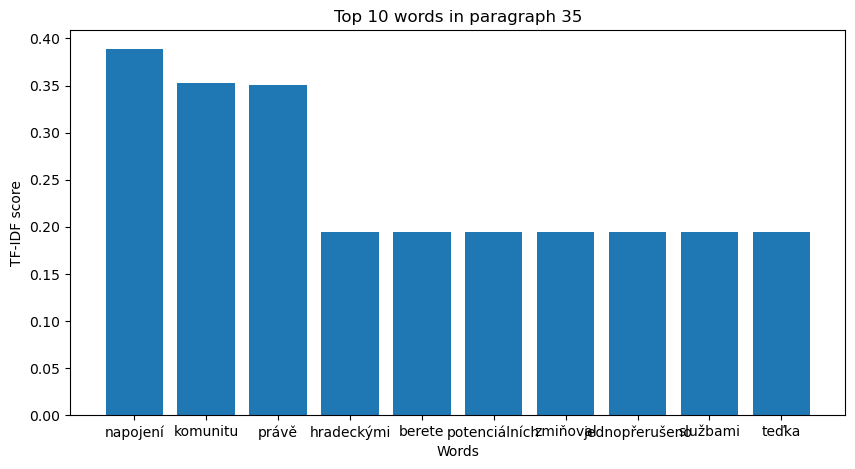

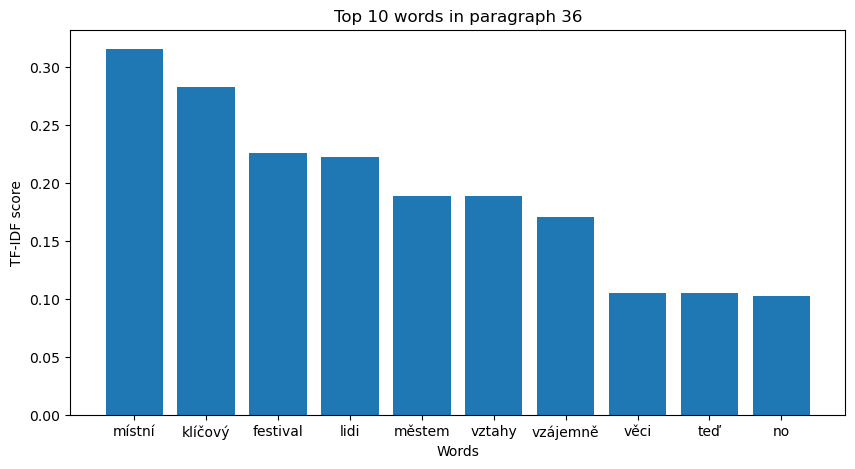

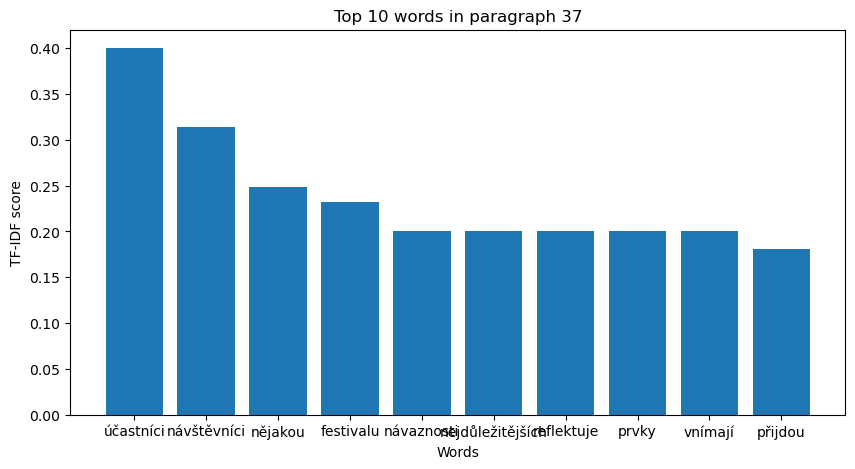

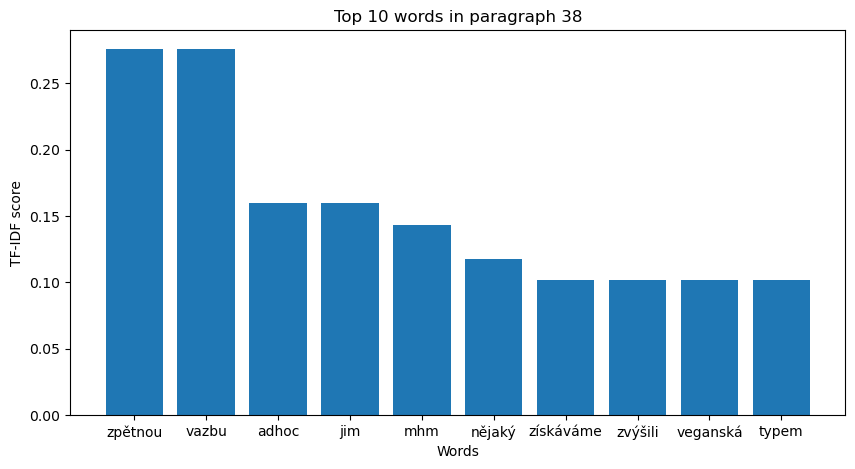

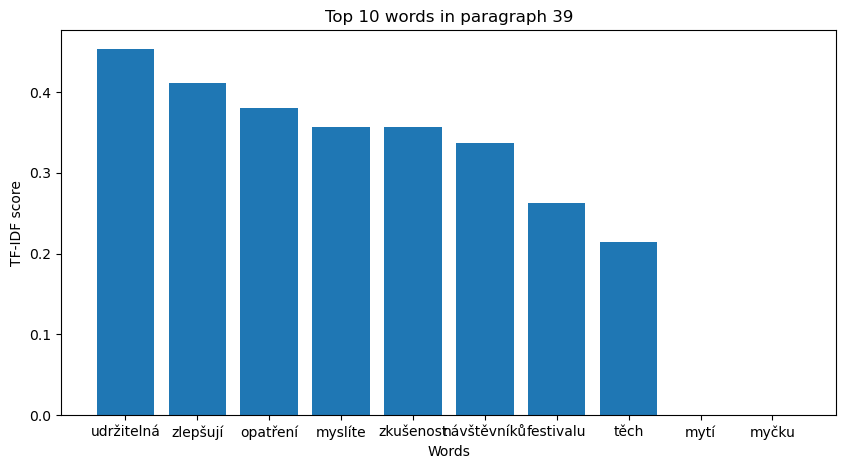

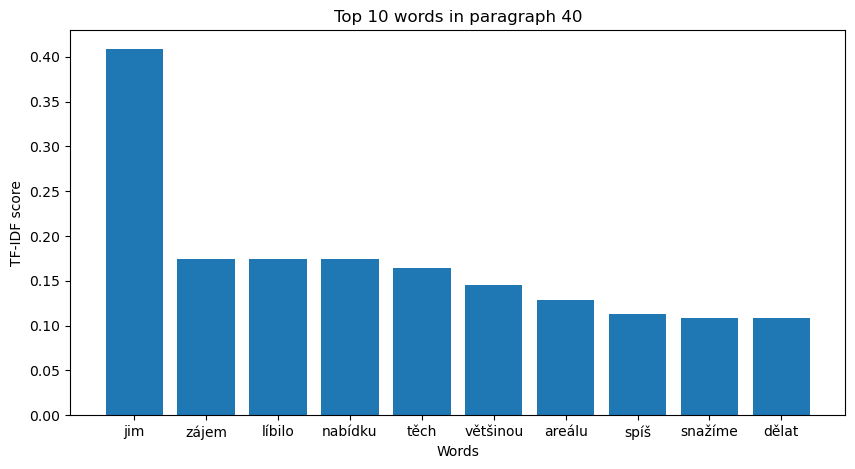

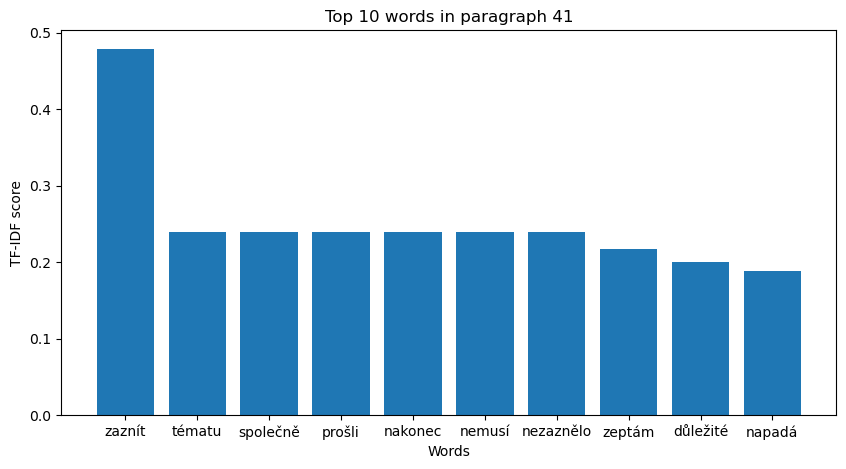

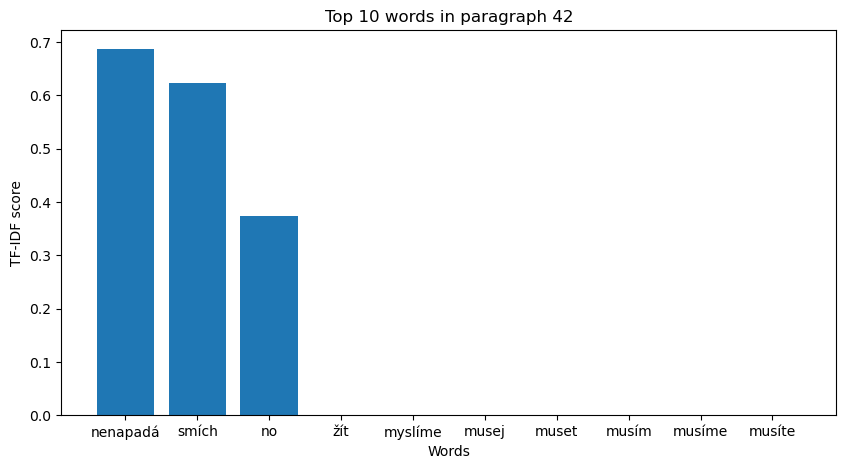

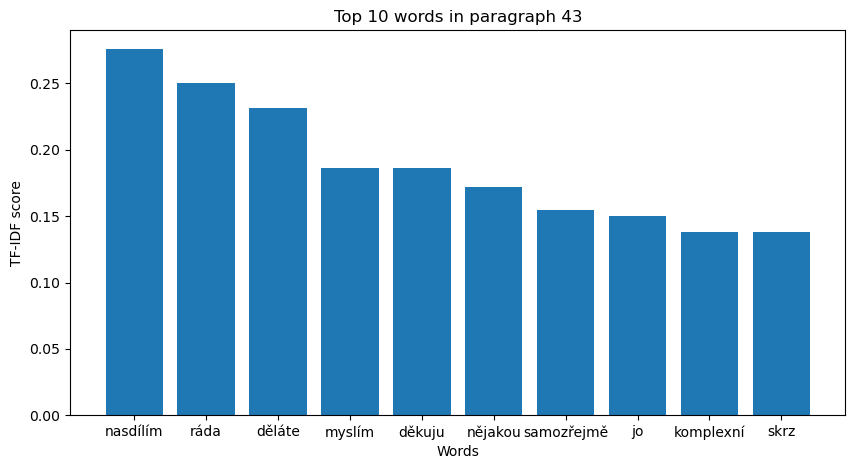

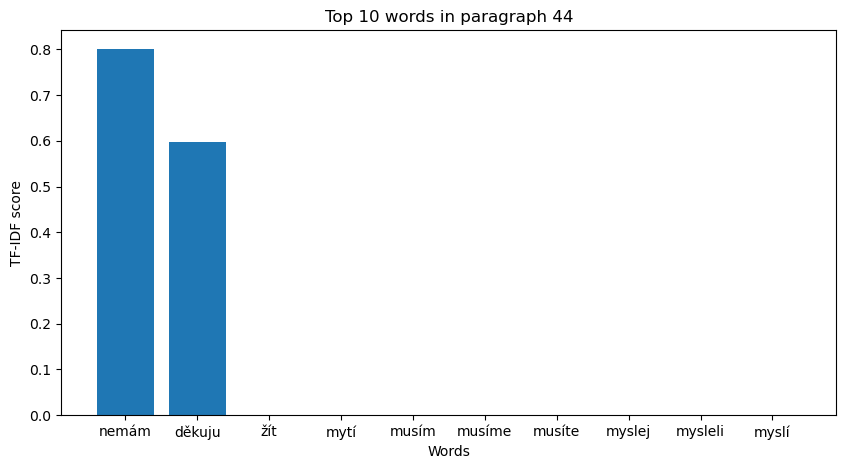

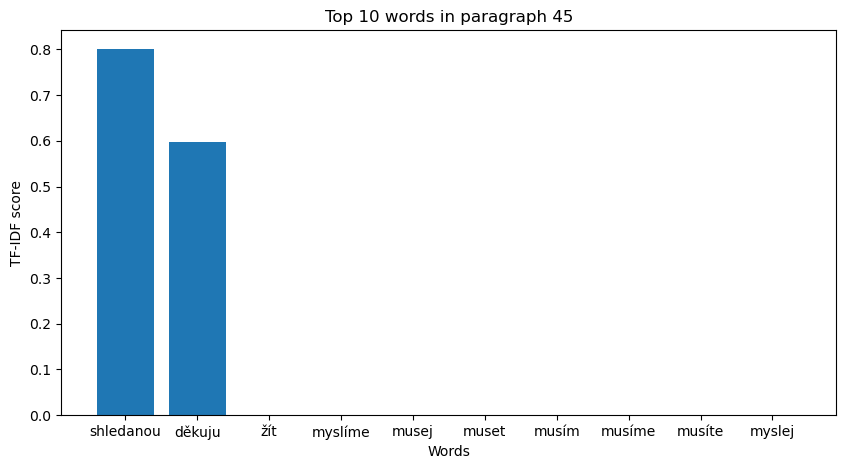

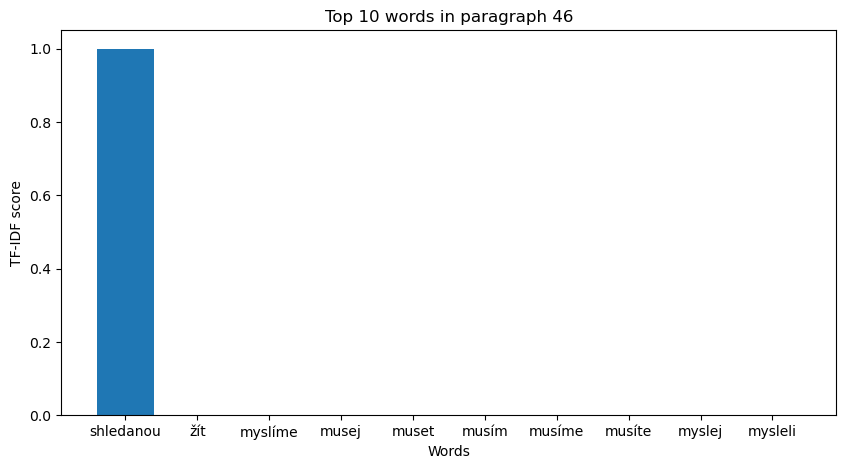

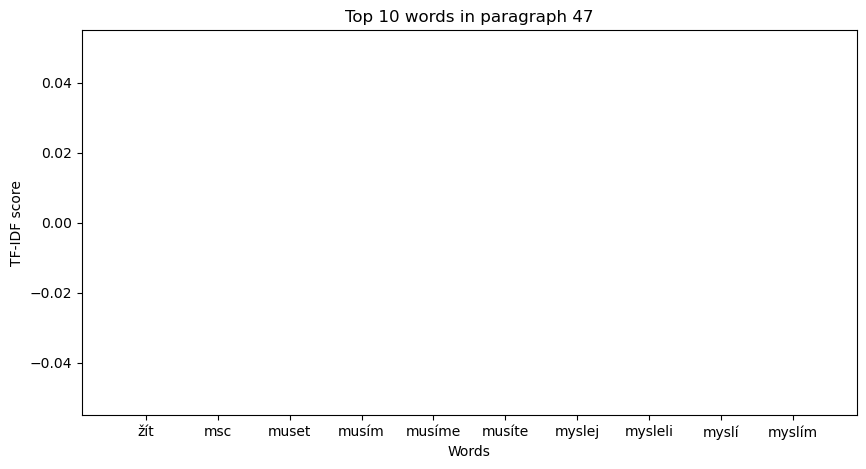

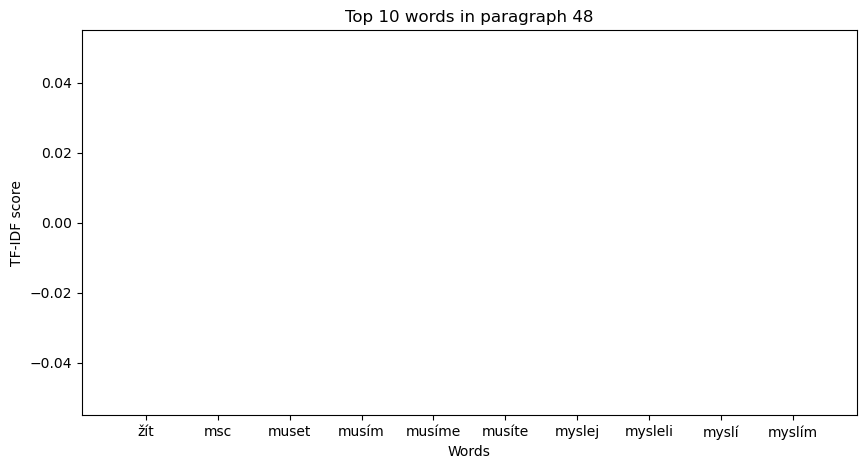

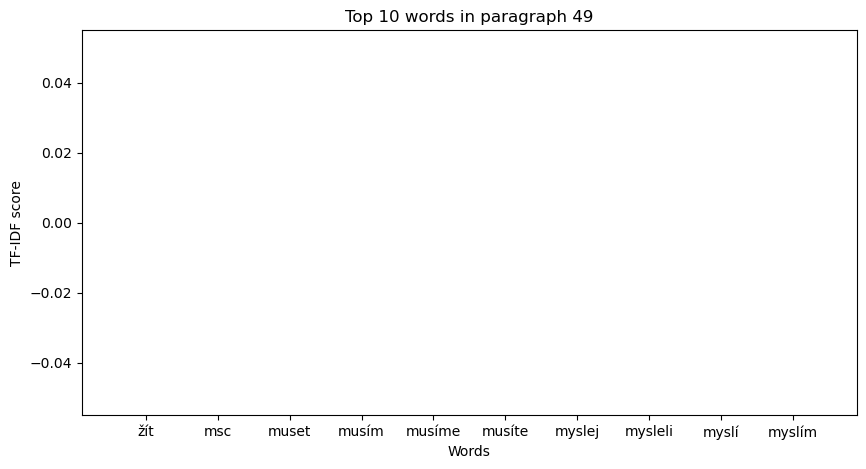

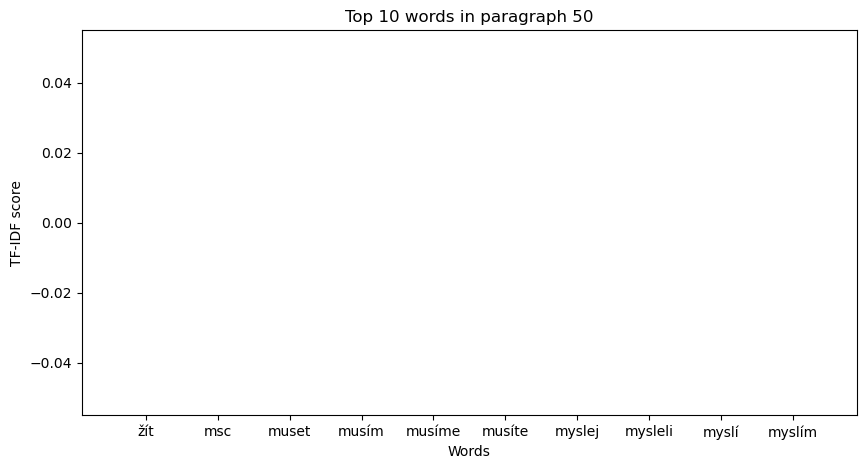

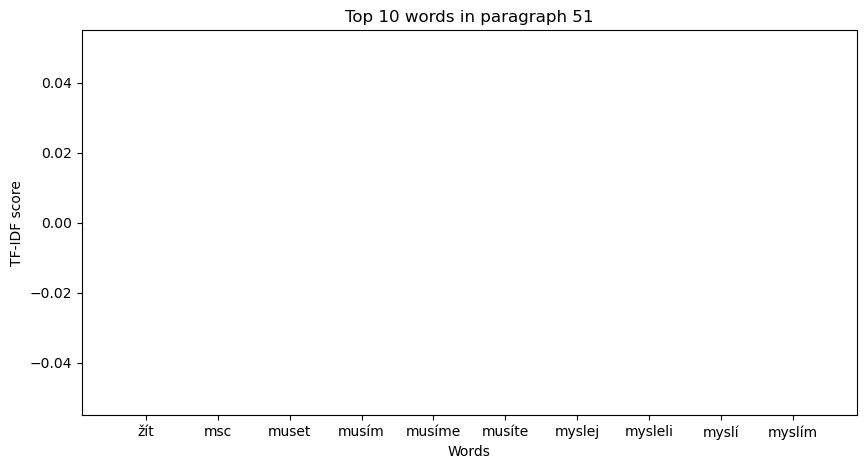

In [13]:
import numpy as np

tfidf_scores = vectorizer.fit_transform(paragraphs)

feature_names = vectorizer.get_feature_names_out()
for i, scores in enumerate(tfidf_scores.toarray()):
    sorted_indices = np.argsort(scores)[::-1]
    sorted_words = np.array(feature_names)[sorted_indices]
    sorted_scores = scores[sorted_indices]
    
    plt.figure(figsize=(10, 5))
    plt.bar(sorted_words[:10], sorted_scores[:10])
    plt.title(f'Top 10 words in paragraph {i+1}')
    plt.xlabel('Words')
    plt.ylabel('TF-IDF score')
    plt.show()
